<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/04.%20Chapter%2004/chapter_04_training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4: Training Models

Notebook ini mereproduksi dan menjelaskan isi Bab 4 dari buku _Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow_ oleh Aurélien Géron.

Topik utama:
- Linear Regression (Normal Equation & Gradient Descent)
- Polynomial Regression
- Regularisasi (Ridge, Lasso, ElasticNet)
- Logistic Regression


Intercept: [3.89646437]
Coefficient: [[3.07129681]]


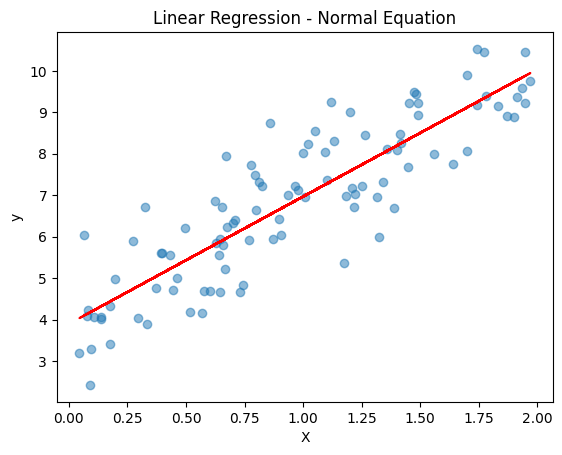

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data sederhana
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Normal Equation
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)

# Plot
plt.scatter(X, y, alpha=0.5)
plt.plot(X, lin_reg.predict(X), color="red")
plt.title("Linear Regression - Normal Equation")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


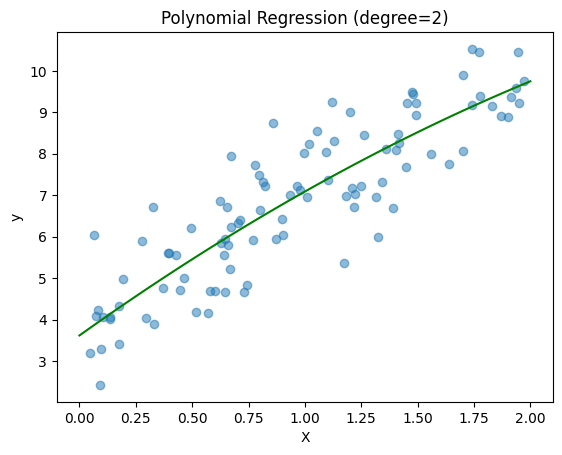

In [2]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Polynomial regression
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])
poly_reg.fit(X, y)
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_new = poly_reg.predict(X_new)

plt.scatter(X, y, alpha=0.5)
plt.plot(X_new, y_new, color="green")
plt.title("Polynomial Regression (degree=2)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [3]:

from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

print("Ridge:", ridge_reg.coef_)
print("Lasso:", lasso_reg.coef_)
print("ElasticNet:", elastic_net.coef_)


Ridge: [2.9710521]
Lasso: [2.73389207]
ElasticNet: [2.48360448]


In [4]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_class, y_class = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                       n_informative=2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_class, y_class)

y_pred = log_reg.predict(X_class)
print(classification_report(y_class, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

